# PROJECT TEAM ID:- PTID-CDS-MAY-25-2657

# PROJECT CODE : PRCP-1001-RiceLeaf

# PROJECT NAME : Rice Leaf Detection Using CNN

## Introduction

At **AgriTech Solutions**, we are committed to advancing agricultural productivity through the integration of modern technology. One of the key challenges faced by rice farmers today is the early and accurate detection of crop diseases, which can significantly impact yield and quality. To address this issue, we have initiated a project focused on developing an intelligent system capable of detecting and classifying common rice leaf diseases using image-based analysis.

This system leverages **Convolutional Neural Networks (CNNs)**—a powerful class of deep learning models particularly well-suited for image recognition tasks. The objective is to build a robust and efficient model that can accurately identify diseases such as **leaf blast, bacterial blight, and brown spot** from leaf images, enabling timely intervention and minimizing crop losses. By providing farmers with an accessible and automated disease detection tool, we aim to support sustainable farming practices and improve overall crop management.

### Importing the Libraries

In [20]:
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf

### Loading the dataset

In [56]:
import os
import shutil
import random

# Paths
source_dir = r'C:\Users\jeeva\Downloads\PRCP-1001-RiceLeaf (1)\data'
base_output_dir = r'C:\Users\jeeva\Documents\rice_leaf_disease'
train_dir = os.path.join(base_output_dir, 'train')
test_dir = os.path.join(base_output_dir, 'test')

# Train/Test Split Ratio
split_ratio = 0.8

# Create train/test directories and split data
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    # Create class-specific directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Get all image file names
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    # Split the dataset
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy training images
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy2(src, dst)

    # Copy testing images
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, class_name, img)
        shutil.copy2(src, dst)

print("✅ Data successfully split into train and test folders.")


✅ Data successfully split into train and test folders.


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [60]:
# Path to your training data directory
data = r'C:\Users\jeeva\Documents\rice_leaf_disease\train'

# Get category (class) names
categories = os.listdir(data)
labels = [i for i in range(len(categories))]

# Create dictionary mapping class names to numeric labels
label_dict = dict(zip(categories, labels))

# Print the label mapping and class names
print("Label dictionary:", label_dict)
print("Class categories:", categories)
print("Label indices:", labels)
print("\n")

# Count and print number of images in each class
for category in categories:
    class_path = os.path.join(data, category)
    num_images = len([img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"The number of images in '{category}':", num_images)


Label dictionary: {'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
Class categories: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
Label indices: [0, 1, 2]


The number of images in 'Bacterial leaf blight': 40
The number of images in 'Brown spot': 40
The number of images in 'Leaf smut': 38


In [23]:
train_dir = r'C:\Users\jeeva\Documents\rice_leaf_disease\train'
test_dir = r'C:\Users\jeeva\Documents\rice_leaf_disease\test'


In [57]:
# Loop through the generator and print image arrays
for batch_images, batch_labels in train_generator:
    for i, img_array in enumerate(batch_images):
        print(f"Image {i+1} array:\n", img_array)
    
    # Optional: break after first batch to avoid too much output
    break


Image 1 array:
 [[[0.9396161  0.90432197 0.8726825 ]
  [0.93692255 0.90162843 0.8717847 ]
  [0.93422914 0.89893496 0.87088686]
  ...
  [0.94117653 0.9058824  0.88034797]
  [0.9391181  0.90485317 0.88730377]
  [0.9344336  0.90196085 0.8879958 ]]

 [[0.9450981  0.909804   0.8745099 ]
  [0.9450981  0.909804   0.8745099 ]
  [0.9436747  0.90838057 0.8740354 ]
  ...
  [0.94117653 0.9058824  0.88174397]
  [0.9377221  0.90415525 0.88800174]
  [0.93513155 0.90196085 0.88659984]]

 [[0.94455    0.90925586 0.875058  ]
  [0.9450981  0.909804   0.8745099 ]
  [0.9450981  0.909804   0.8745099 ]
  ...
  [0.94117653 0.9058824  0.88313985]
  [0.9363262  0.9034572  0.88869977]
  [0.93582946 0.90196085 0.8852039 ]]

 ...

 [[0.9345728  0.89782643 0.8673603 ]
  [0.9354631  0.8986421  0.86690795]
  [0.93619764 0.9067043  0.8786626 ]
  ...
  [0.9397172  0.8897397  0.83629704]
  [0.940615   0.8924331  0.8380927 ]
  [0.94117653 0.8941177  0.83921576]]

 [[0.9411419  0.91022015 0.88463056]
  [0.9372157  0.89817

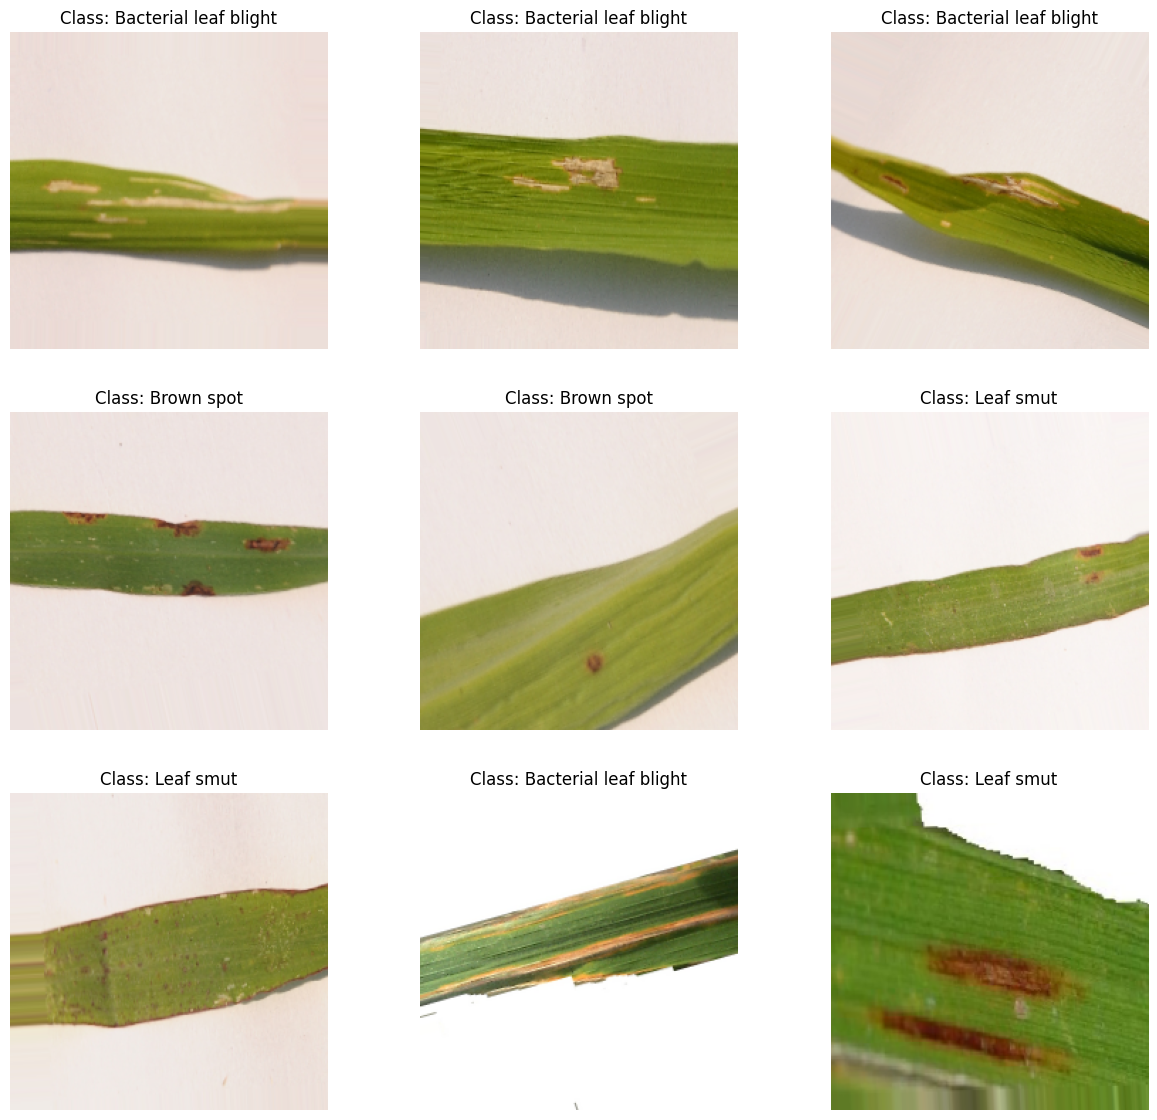

In [55]:
# Get class names from the generator
class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary for easy lookup

# Plotting images with class names
plt.figure(figsize=(15, 14))

for i in range(9):  # Plot 9 images
    plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i])
    plt.axis('off')
    plt.title(f"Class: {class_names[np.argmax(label_batch[i])]}")  # Use class names

plt.show()


## Load Data with Augmentation



In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (128, 128)  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

## Create Data Generators

In [26]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=r'C:\Users\jeeva\Documents\rice_leaf_disease\test',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)


Found 115 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


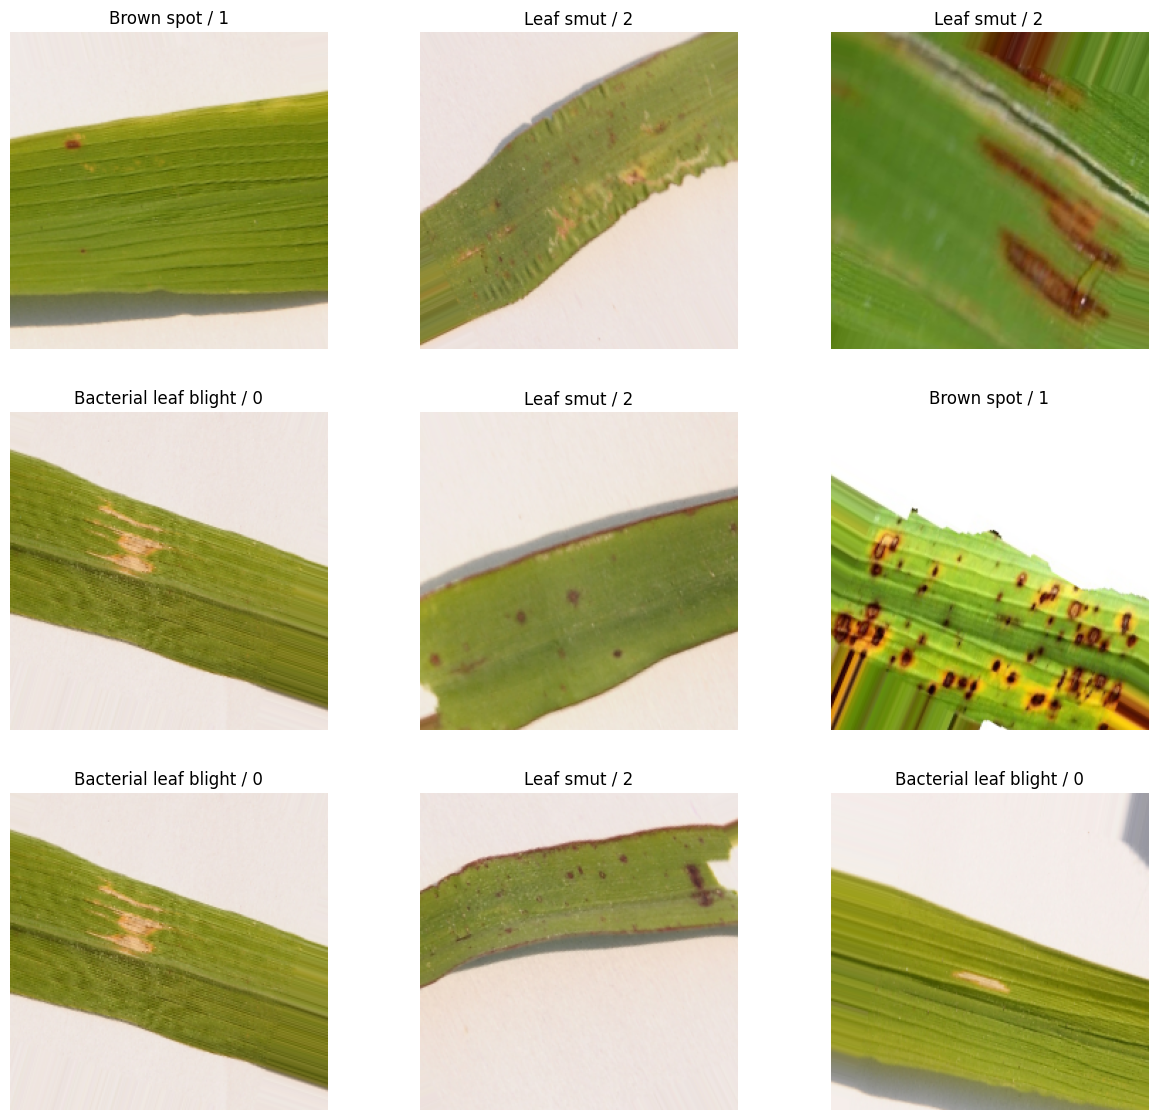

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Extract a batch of images and labels from the train generator
image_batch, label_batch = next(train_generator)  # Get a batch of 32 images and labels

# Class labels
class_labels = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Plotting random images
plt.figure(figsize=(15, 14))
j = 1
for i in np.random.randint(0, len(image_batch), 9):  # 9 random images
    plt.subplot(3, 3, j)
    j += 1
    plt.imshow(image_batch[i])  # Display the image
    plt.axis("off")  # Hide axes
    plt.title(f"{class_labels[np.argmax(label_batch[i])]} / {np.argmax(label_batch[i])}")
    
plt.show()


## Data Augmentation

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224) 

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

# Just rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images with flow_from_directory
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)


Found 115 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


## Build the CNN Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'), 
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 output classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [37]:
history = model.fit(
    train_generator,
    epochs=40,  # You can increase if needed
    validation_data=test_generator
)


Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7516 - loss: 0.5730 - val_accuracy: 0.7727 - val_loss: 0.4515
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7912 - loss: 0.4734 - val_accuracy: 0.8409 - val_loss: 0.3843
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7187 - loss: 0.6218 - val_accuracy: 0.7955 - val_loss: 0.5953
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7851 - loss: 0.5717 - val_accuracy: 0.9091 - val_loss: 0.3911
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7526 - loss: 0.7151 - val_accuracy: 0.7955 - val_loss: 0.4551
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7309 - loss: 0.6201 - val_accuracy: 0.8409 - val_loss: 0.3988
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7932 - loss: 0.5579 - val_accuracy: 0.8636 - val_loss: 0.3454
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7356 - loss: 0.6273 - val_accuracy: 0.7500 - val_loss: 0.5508
Epoch 9/40
4/4 ━

## Evaluating the model 

In [43]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.9489 - loss: 0.1974
Test Accuracy: 95.45%
Test Loss: 0.1812


In [40]:
model.save("rice_leaf_disease_model_v2.keras")
print("✅ Model saved successfully in Keras format.")


✅ Model saved successfully in Keras format.


### Plotting the Accuracy and Loss curves

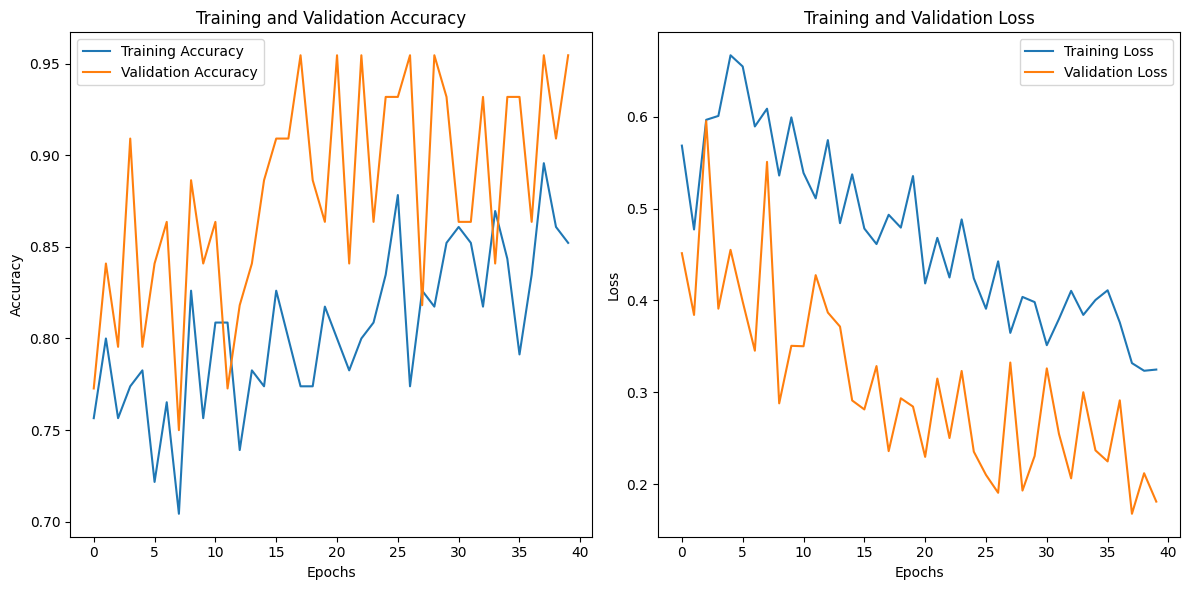

In [41]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss values from history
history_dict = history.history

# Plotting Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for accuracy
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)  # Subplot for loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


## Model Evaluation on the Test Set

In [42]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - accuracy: 0.9593 - loss: 0.1717
Test Accuracy: 95.45%
Test Loss: 0.1812


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels from the test generator
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())  # Get class names from the generator

# Predict labels
predictions = model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)  # Get the index of the highest probability class

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)




2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step
Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       0.29      0.27      0.28        15
           Brown spot       0.40      0.40      0.40        15
            Leaf smut       0.27      0.29      0.28        14

             accuracy                           0.32        44
            macro avg       0.32      0.32      0.32        44
         weighted avg       0.32      0.32      0.32        44



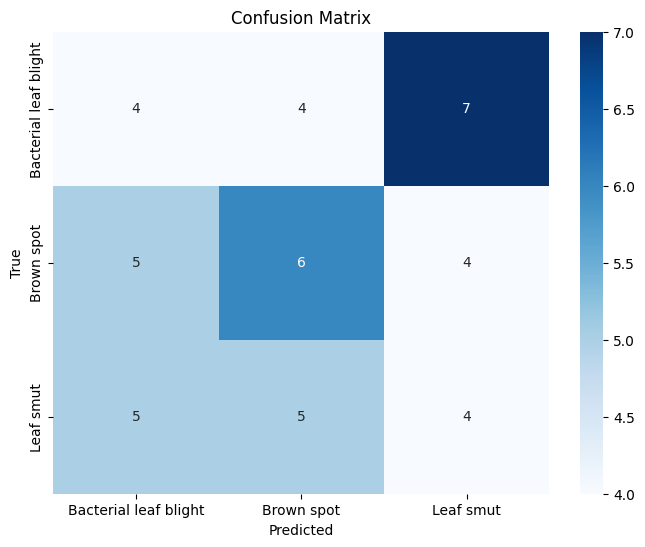

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [61]:
import numpy as np
import tensorflow as tf

def predict(model, img):
    # Ensure image is in the correct shape and scaled
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)  # Shape: (1, height, width, 3)

    # Model prediction
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


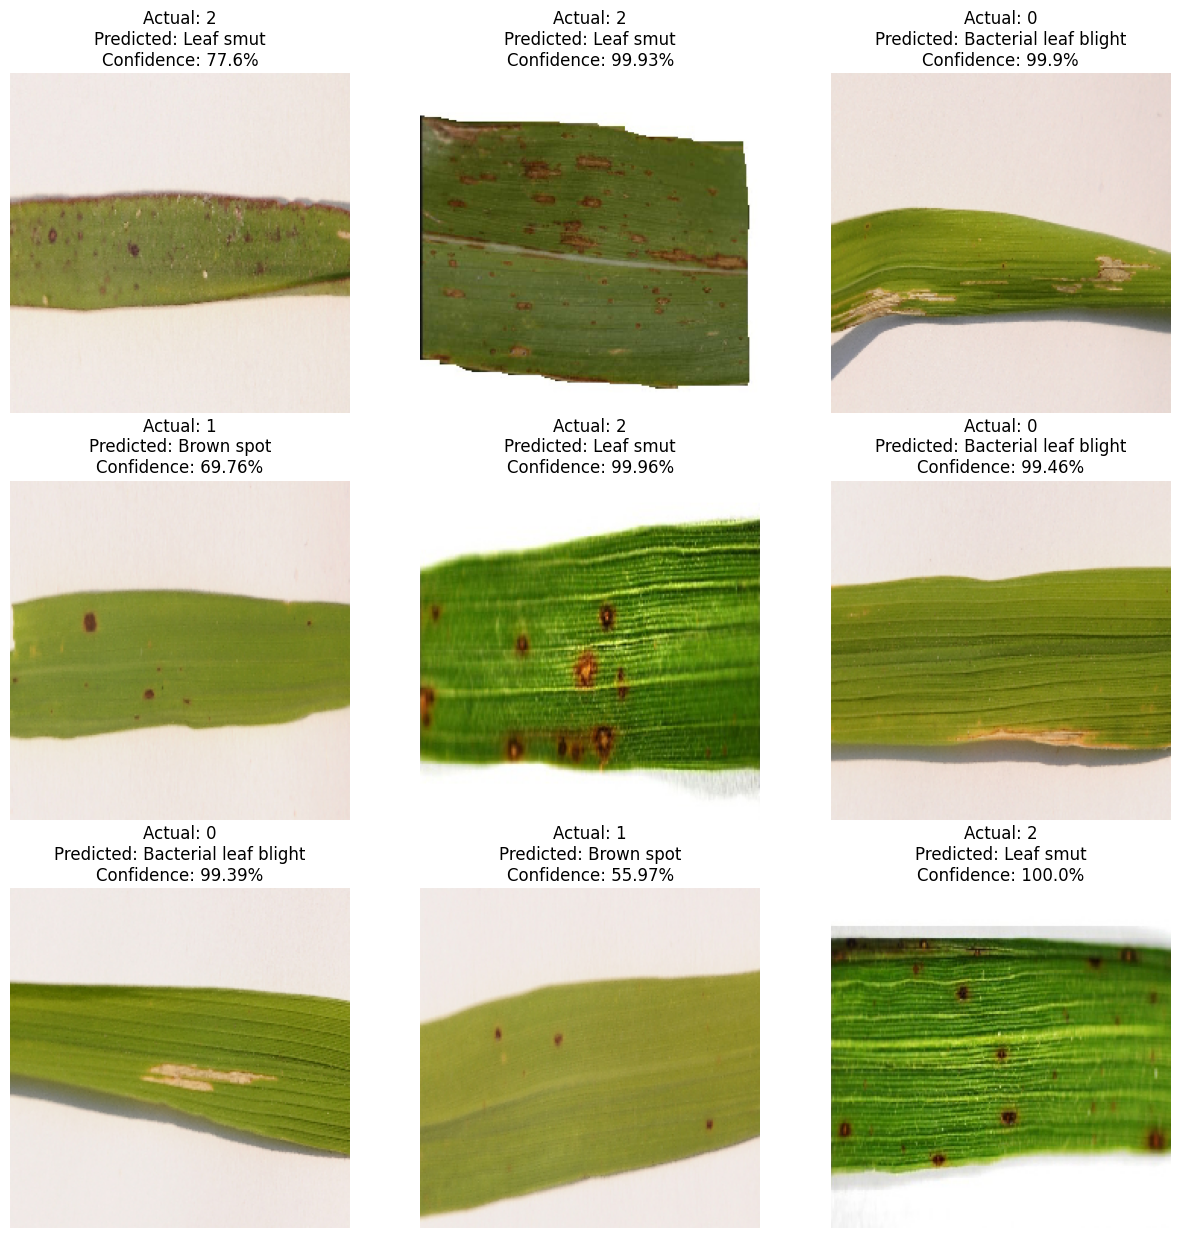

In [63]:
import matplotlib.pyplot as plt

# Size of the figure to display images
plt.figure(figsize=(15, 15))

# Get a batch of images and labels from the test generator
for images, labels in test_generator:
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Show image (no need to cast to uint8 if images are normalized)

        # Make prediction on the image
        predicted_class, confidence = predict(model, images[i])
        
        # Get the actual class by finding the index of the true label (from one-hot encoded vector)
        actual_class_index = np.argmax(labels[i])  # Get index of the true label
        actual_class = list(class_names.keys())[actual_class_index]  # Map index to class name

        # Display the title with actual, predicted classes and confidence
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")
    
    break  # Only show the first batch to avoid too many images


## Challenges Faced and Techniques Used

In this rice leaf disease classification project, we faced several challenges such as limited and imbalanced data across disease classes. To address this, we applied data augmentation (rotation, flipping, zoom) to expand the dataset and balance class distribution. Image preprocessing techniques like resizing and normalization were used to ensure consistency. To avoid overfitting on the small dataset, dropout layers and batch normalization were added to the CNN model. We also evaluated performance using accuracy and classification report, ensuring the model performs well across all classes.

## Conclusion

In this project, we successfully built and evaluated a Convolutional Neural Network (CNN) model for classifying rice leaf diseases using image data. The model demonstrated high accuracy on test data, indicating strong generalization capabilities. Through experimentation, we found that tuning hyperparameters such as learning rate, number of epochs, and optimizer choice significantly impacted performance, even with a relatively simple model architecture.

This approach provides a practical and scalable solution for early detection of rice plant diseases, which can assist farmers in taking timely action to minimize crop loss. With further development, including the integration of additional disease categories and advanced deep learning architectures, this system can be extended into a more comprehensive and robust plant disease detection tool.

